<a href="https://colab.research.google.com/github/jazu1412/PYCARET_LOWCODE_ML/blob/main/cirrhosis_multiclass_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#liver cirrhosis classifier for stage 1,2,3,4 using PyCaret
This notebook demonstrates the use of PyCaret's Classification module to build a liver cirrhosis classifier for stage 1,2,3,4

Dataset source: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset/data

In [ ]:
# Install PyCaret if not already installed
!pip install pycaret[full]
!pip install gradio;
!pip install pycaret[mlops]

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from pycaret.classification import *

In [ ]:
from google.colab import files
uploaded_files = files.upload()

Saving cirrhosis.csv to cirrhosis.csv


In [ ]:
ls

cirrhosis.csv  data.csv  logs.log  sample_data/


In [ ]:
import io
import csv
try: #Removed extra indent
    data = pd.read_csv('cirrhosis.csv')  # Disable low memory mode for more reliable parsing
    print(f"Successfully loaded {len(data)} rows.")
    print(data.head())
except Exception as e:
    print(f"An error occurred while reading the file: {str(e)}")
    print("Please check the file format and try again.")

Successfully loaded 418 rows.
   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          1

In [ ]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:

data.isnull().sum()

,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


In [ ]:
# Remove rows with missing values in the 'password' column
data = data.dropna(subset=['Stage'])



# Initialize setup
setup(data=data, target='Stage', session_id=111, experiment_name='password_strength_classifier',use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,111
1,Target,Stage
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3"
4,Original data shape,"(412, 20)"
5,Transformed data shape,"(412, 24)"
6,Transformed train set shape,"(288, 24)"
7,Transformed test set shape,"(124, 24)"
8,Numeric features,12
9,Categorical features,7


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
# Compare models
compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5351,0.0000,0.5351,0.5251,0.5143,0.3017,0.3097,0.1630
ridge,Ridge Classifier,0.5347,0.0000,0.5347,0.5192,0.5074,0.2926,0.3025,0.1620
rf,Random Forest Classifier,0.5032,0.7012,0.5032,0.4653,0.4671,0.2445,0.2589,0.4450
gbc,Gradient Boosting Classifier,0.4963,0.0000,0.4963,0.4896,0.4757,0.2433,0.2512,1.1040
xgboost,Extreme Gradient Boosting,0.4962,0.6847,0.4962,0.4847,0.4754,0.2435,0.2514,0.3910
et,Extra Trees Classifier,0.4858,0.6882,0.4858,0.4671,0.4577,0.2194,0.2285,0.3960
lr,Logistic Regression,0.4759,0.0000,0.4759,0.4603,0.4532,0.2105,0.2191,0.3780
lightgbm,Light Gradient Boosting Machine,0.4722,0.6893,0.4722,0.4660,0.4538,0.2118,0.2194,0.5070
dt,Decision Tree Classifier,0.4307,0.5900,0.4307,0.4453,0.4295,0.1729,0.1757,0.2250
ada,Ada Boost Classifier,0.4262,0.0000,0.4262,0.4114,0.4061,0.1538,0.1590,0.3530


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

[LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=111, solver='auto',
                 tol=0.0001),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=111, verbose=0,
                        warm_start=False)]

In [ ]:
# Create and tune the best model
best_model = create_model('rf')
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5862,0.7298,0.5862,0.6092,0.5619,0.3579,0.3856
1,0.4138,0.5981,0.4138,0.3391,0.3646,0.0853,0.0927
2,0.6897,0.8105,0.6897,0.5049,0.5821,0.5140,0.5641
3,0.4828,0.6381,0.4828,0.4390,0.4546,0.2314,0.2356
4,0.3793,0.6269,0.3793,0.3862,0.3774,0.1000,0.1021
5,0.4828,0.7306,0.4828,0.4982,0.4292,0.2232,0.2527
6,0.5172,0.7157,0.5172,0.4847,0.4974,0.2763,0.2801
7,0.5517,0.7904,0.5517,0.4894,0.5150,0.3327,0.3372
8,0.5000,0.7679,0.5000,0.5011,0.4821,0.2144,0.2271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5862,0.7424,0.5862,0.6724,0.5372,0.3507,0.3861
1,0.4138,0.6167,0.4138,0.3199,0.3555,0.0802,0.0883
2,0.6552,0.8143,0.6552,0.4819,0.5545,0.4600,0.5048
3,0.3448,0.6612,0.3448,0.2454,0.2860,0.0000,0.0000
4,0.5517,0.6697,0.5517,0.5112,0.5066,0.3133,0.3359
5,0.4828,0.7112,0.4828,0.4483,0.4138,0.1899,0.2339
6,0.5172,0.7027,0.5172,0.4091,0.4547,0.2523,0.2652
7,0.6207,0.8216,0.6207,0.5433,0.5761,0.4242,0.4312
8,0.6071,0.7927,0.6071,0.6889,0.5612,0.3701,0.4171


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


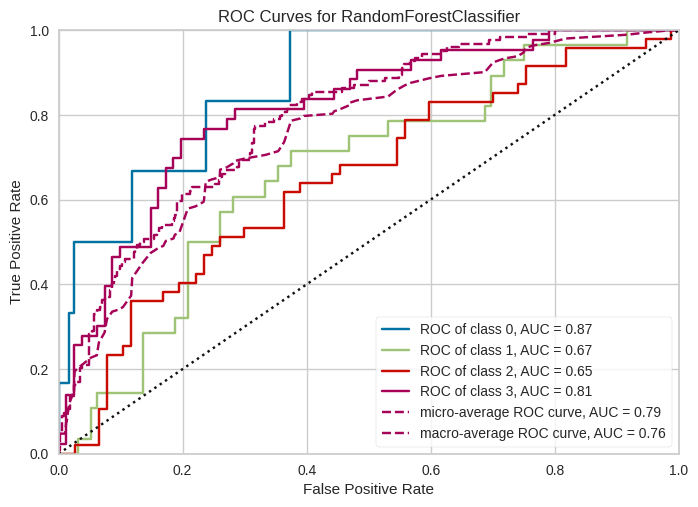

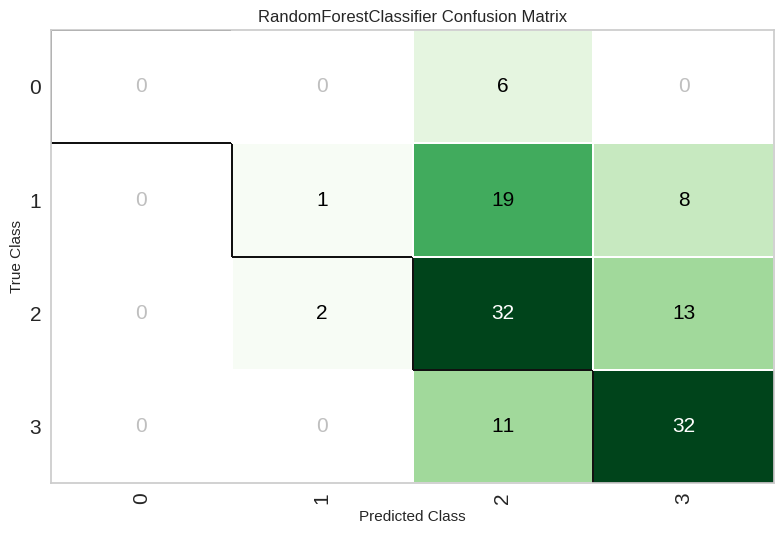

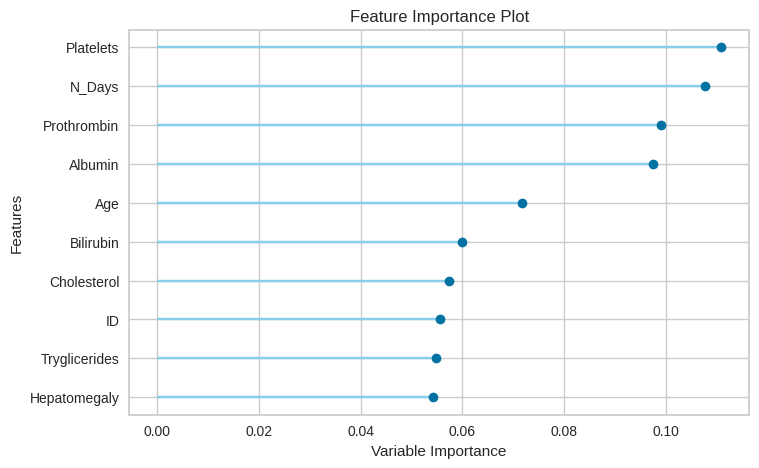

In [ ]:
# Plot model performance
plot_model(tuned_model, plot='auc')
plot_model(tuned_model, plot='confusion_matrix')
plot_model(tuned_model, plot='feature')

In [ ]:
# Ensemble models
bagged_model = ensemble_model(tuned_model, method='Bagging')
boosted_model = ensemble_model(tuned_model, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5862,0.7358,0.5862,0.4410,0.4943,0.3459,0.3954
1,0.4138,0.6131,0.4138,0.3303,0.3656,0.0887,0.0937
2,0.6552,0.8550,0.6552,0.4752,0.5508,0.4590,0.5028
3,0.4138,0.6617,0.4138,0.4080,0.3797,0.1149,0.1220
4,0.5862,0.6750,0.5862,0.5642,0.5451,0.3615,0.3882
5,0.4138,0.6747,0.4138,0.3816,0.3682,0.0921,0.1043
6,0.5517,0.7561,0.5517,0.4202,0.4737,0.2993,0.3224
7,0.5862,0.8060,0.5862,0.5287,0.5549,0.3830,0.3860
8,0.6071,0.7985,0.6071,0.4845,0.5251,0.3649,0.4173


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5862,0.0000,0.5862,0.6189,0.5808,0.3661,0.3851
1,0.4483,0.0000,0.4483,0.3677,0.3825,0.1359,0.1552
2,0.6552,0.0000,0.6552,0.4752,0.5508,0.4590,0.5028
3,0.4483,0.0000,0.4483,0.4639,0.4315,0.1714,0.1796
4,0.4483,0.0000,0.4483,0.4614,0.4372,0.1902,0.1970
5,0.4828,0.0000,0.4828,0.5147,0.4532,0.2314,0.2504
6,0.5172,0.0000,0.5172,0.4885,0.4992,0.2763,0.2801
7,0.5862,0.0000,0.5862,0.5445,0.5621,0.3884,0.3920
8,0.5000,0.0000,0.5000,0.5163,0.4924,0.2359,0.2455


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Finalize model
final_model = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5242,0.7203,0.5242,0.4630,0.4567,0.2548,0.2740


In [ ]:
# Save model
save_model(final_model, 'liver_cirrohsis_stage')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ID', 'N_Days', 'Age', 'Bilirubin',
                                              'Cholesterol', 'Albumin', 'Copper',
                                              'Alk_Phos', 'SGOT',
                                              'Tryglicerides', 'Platelets',
                                              'Prothrombin'],
                                     transformer=Si...
 309       N     N  ...     3.35    39.0    1713.0  171.000000          100.0   
 
      Platelets  Prothrombin  Stage  prediction_label  prediction_score  
 345      160.0         11.0    4.0                 4            0.5563  
 95       338.0         10

In [ ]:
# Create a basic app for inference
create_app(final_model)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4949fb058fe20c6505.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
